In [230]:
from bertopic import BERTopic
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from bertopic.vectorizers import ClassTfidfTransformer

In [305]:
# docs = pd.read_csv('../../DATA/NEW_ALL_RELIGION_FULL_POST.csv')
docs = pd.read_csv('../../DATA/NEW_ALL_VIDEO_GAMES.csv')
docs = docs[docs.GAME == 'leagueoflegends']
#removing duplicates
docs= docs.drop_duplicates(subset='CONTENT')
# docs = docs[docs['CONTENT'].str.contains(r'\bQuran\b|\bzakat\b|\bsong\b|\bkufr\b|\bpray\b|\bjihad\b|\bbetting\b|\bidol\b|\bstatues\b|\bgod\b|\bwudhu\b|\bhijab\b|\bhalal\b|\bEid\b|\bblasphemous\b|\bblasphemy\b|\bmusic\b|\bturkey\b|\bislamic\b|\binsult\b|\bAllah\b|\bMashallah\b|\bvideo games\b|\bgame\b|\bStop\b|\bSin\b|\bhate\bMuslim\bIslam\bcontroversial\b|\bcontroversy\b|\bdangerous\b|\bguilty\b|\bterror\b|\bmiddle\b|\bmiddle-east\b|\bviolence\b|\bislamophobia\b|\bIndia\b|\bSaudi\b|\bArabia\b|\bDDiwara\b|\bculture\b|\bdestroy\b|\bprayer\b|\bpornography\b|\bBad\b|\bproblem\b|\bhurt\b|\bcool\b|\bharam\b|\bChristian\b|\bChristians\b|\bPope\b|\bPastor\b|\bpastor\b|\bHoly\b|\bArthurian\b|\bSmite\b|\bGods\b|\badvice\b|\bpornographic\b|\bJerusalem\b|\bJewish\b|\bPork\b|\bCatholic\b|\bCatholicism\b|\bHindu\b|\bLore\b|\bBiblical\b|\balcohol\b|\bMary\b|\bSynagogues\b|\bsemi-christian\b|\bchristmas\b|\bFeedback\b|\bchrist\b|\bpriests\b|\bBible\b|\bbible\b|\bmorality\b|\bgender\b|\bCathedral\b|\bAbrahamic\b|\bbaptist\b|\bpastor\b|\bAbraham\b|\bsacrilage\b|\bsin\b|\bblasphemous\b|\bporn\b|\bblasphemy\b|\bVatican\b|\bconservatives\b|\bcriticism\b|\bcriticized\b|\bchurch\b|\bchurches\b|\bchristianity\b|\bChristianity\b|\bReligion\b|\bReligious\b|\bJesus\b|\bGod\b|\bThanvir\b|\bvideo games\b|\bgames\b|\bBhagwan\b|\bMaa\b|\bProud\b|\bCelebrate\b|\bStop\b|\bSin\b|\bhate\b|\bKali\b|\bArjuna\b|\bcontroversial\b|\bcontroversy\b|\bdangerous\b|\bMusic\b|\bDurga\b|\bConcept\b|\bKarma\b|\bGanesha\b|\bNarasimha\b|\bVamana\b|\bDharmic\b|\bDharma\b|\bDeepavali\b|\bIndic\b|\bIndo\b|\bSiva\b|\bIdea\b|\bLore\b|\bDiwali\b|\bVeda\b|\bVedic\b|\bAsur\b|\bAsuran\b|\bAsura\b|\bRavan\b|\bRavana\b|\bMonkey\b|\bShree\b|\bJai\b|\bHanuman\b|\bBharat\b|\bTemples\b|\bangry\b|\bHinduism\b|\bKali\b|\bDevi\b|\bSaraswati\b|\bHindu\b|\bShiva\b|\bRama\b|\bGanesha\b|\bGanesh\b|\bTemples\b|\bGods\b|\bGodess\b|\bKrishna\b|\bdesign\b|\bTamil\b|\bCaste\b|\bBad\b|\bproblem\b|\bhurt\b|\bcool\b|\bganesh\b', na=False, case=False, regex=True)]

docs = docs[docs.RELIGION == 'Christianity']
docs = docs[docs['POST/COMMENT']=='POST']
docs['CONTENT'] = docs['CONTENT'].astype(str)
df = docs['CONTENT']
docs = docs['CONTENT'].tolist()
len(docs)

223

In [306]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stopwords = list(stopwords.words('english')) + ['http://', 'https://','http','imgur' ,'https', 'amp', 'com','www','x200b','\n']

# we add this to remove stopwords that can pollute topcs
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words=stopwords)

from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN

embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
umap_model = UMAP(n_neighbors=3, n_components=3, min_dist=0.05)
hdbscan_model = HDBSCAN(min_cluster_size=40, min_samples=5,
                        gen_min_span_tree=True,
                        prediction_data=True)

In [307]:
from bertopic import BERTopic
model = BERTopic(
    umap_model=umap_model,
    # hdbscan_model=hdbscan_model,
    embedding_model=embedding_model,
    #representation_model=representation_model,
    vectorizer_model=vectorizer_model,
    top_n_words=5,
    language='english',
    calculate_probabilities=True,
    verbose=True,
    # nr_topics='auto'
)
topics, probs = model.fit_transform(docs)

Batches: 100%|██████████| 7/7 [00:16<00:00,  2.32s/it]
2023-05-06 04:01:09,423 - BERTopic - Transformed documents to Embeddings
2023-05-06 04:01:11,270 - BERTopic - Reduced dimensionality
2023-05-06 04:01:11,288 - BERTopic - Clustered reduced embeddings


In [308]:
print(model.get_topic_info())

   Topic  Count                                               Name
0     -1     51                          -1_mt_orianna_esports_one
1      0     44                         0_game_pm_league_christian
2      1     42      1_youtube_youtube watch_watch_youtube youtube
3      2     28                    2_nicholaus_noon_high noon_high
4      3     25             3_game_like_christian_christian rights
5      4     22                              4_team_lcs_korean_mid
6      5     11  5_wolves_copenhagen_copenhagen wolves_leaguepedia


In [282]:
documents = pd.DataFrame({"Document": docs,
                          "ID": range(len(docs)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='u_mass')
coherence = coherence_model.get_coherence()
print('U_MASS',coherence)

import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
documents = pd.DataFrame({"Document": docs,
                          "ID": range(len(docs)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence = coherence_model.get_coherence()
print('C_V',coherence)

U_MASS -0.4443373821971377
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
h

In [283]:
model.visualize_barchart(top_n_topics=19,n_words=10)

In [284]:
model.visualize_documents(docs).write_html("Smite Hindu Subreddit Posts.html")

In [285]:
model.visualize_topics()

In [247]:
model.visualize_heatmap()

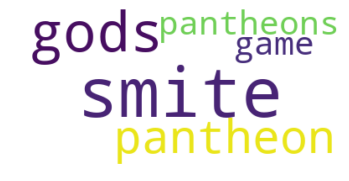

In [204]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
create_wordcloud(model, topic=1)